In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [20]:
start = '2012-01-01'
end = '2023-12-31'

data = yf.download('TSLA', start, end)

[*********************100%%**********************]  1 of 1 completed


In [21]:
data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000
...,...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400


In [22]:
data.reset_index(inplace=True)

In [23]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
1,2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2,2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
3,2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
4,2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000
...,...,...,...,...,...,...,...
3013,2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
3014,2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
3015,2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400
3016,2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900


In [25]:
ma_100_days = data.Close.rolling(100).mean()

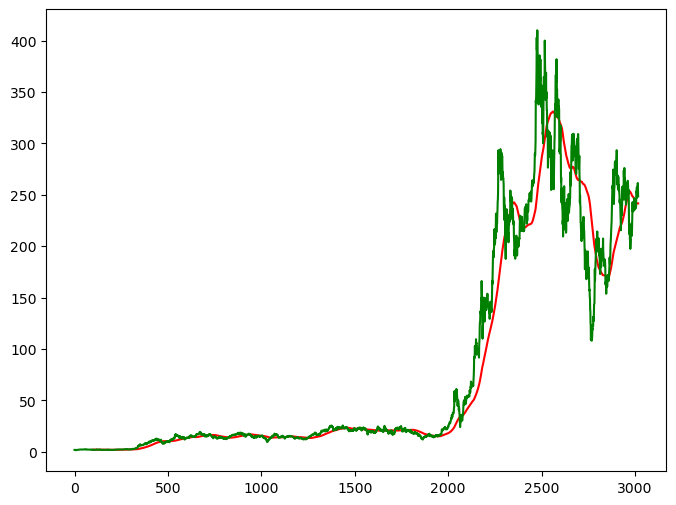

In [26]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [27]:
ma_200_days = data.Close.rolling(200).mean()


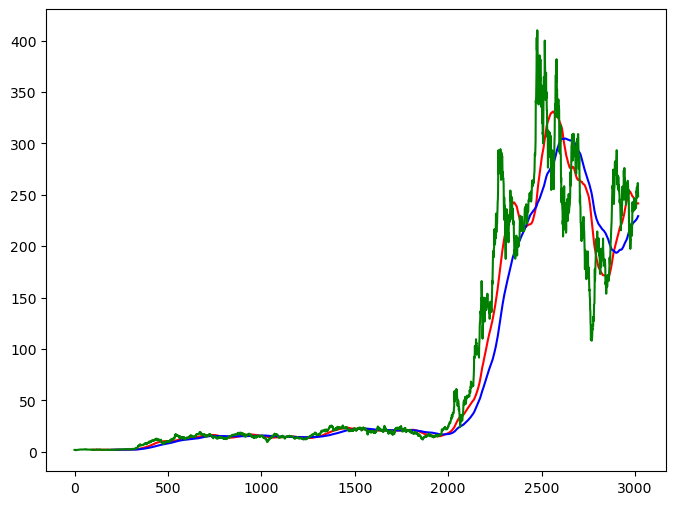

In [28]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [29]:
data.dropna(inplace=True)

In [30]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [31]:
data_train.shape[0]

2414

In [32]:
data_test.shape[0]

604

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [36]:
data_train_scale = scaler.fit_transform(data_train)

In [37]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [38]:
x, y = np.array(x), np.array(y)

In [39]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [40]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [41]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [42]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50

73/73 [==============================] - 20s 188ms/step - loss: 0.0138
Epoch 2/50
73/73 [==============================] - 13s 182ms/step - loss: 0.0035
Epoch 3/50
73/73 [==============================] - 14s 197ms/step - loss: 0.0026
Epoch 4/50
73/73 [==============================] - 13s 178ms/step - loss: 0.0023
Epoch 5/50
73/73 [==============================] - 13s 177ms/step - loss: 0.0027
Epoch 6/50
73/73 [==============================] - 13s 177ms/step - loss: 0.0032
Epoch 7/50
73/73 [==============================] - 13s 177ms/step - loss: 0.0029
Epoch 8/50
73/73 [==============================] - 13s 178ms/step - loss: 0.0022
Epoch 9/50
73/73 [==============================] - 13s 180ms/step - loss: 0.0021
Epoch 10/50
73/73 [==============================] - 13s 176ms/step - loss: 0.0019
Epoch 11/50
73/73 [==============================] - 13s 176ms/step - loss: 0.0019
Epoch 12/50
73/73 [==============================] - 13s 178ms/step - loss: 0.0019
Epoch 13/50


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [44]:
pas_100_days = data_train.tail(100)

In [45]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [46]:
data_test_scale  =  scaler.fit_transform(data_test)

In [47]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [48]:
y_predict = model.predict(x)

19/19 [==============================] - 2s 51ms/step


In [49]:
scale =1/scaler.scale_

In [50]:
y_predict = y_predict*scale

In [51]:
y = y*scale

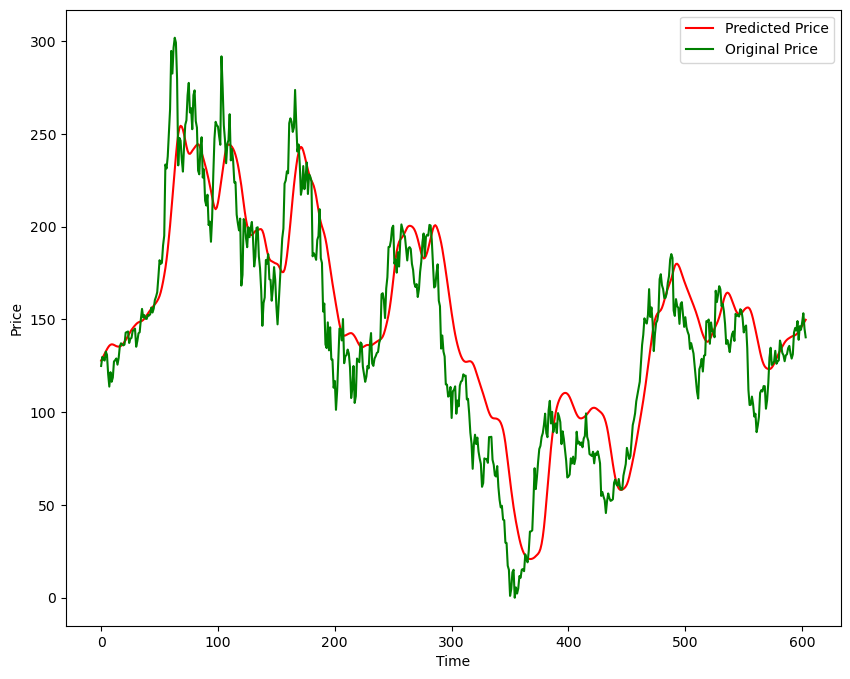

In [52]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [53]:
model.save('Stock Predictions Model.keras')